<a href="https://colab.research.google.com/github/EnriqueRangel/python_practicas/blob/main/Arboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Titanic Kaggle

In [ ]:
import pandas as pd

datos= pd.read_csv('train.csv')

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

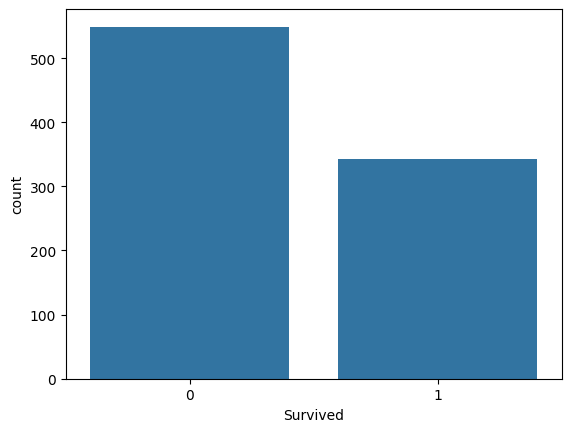

In [ ]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

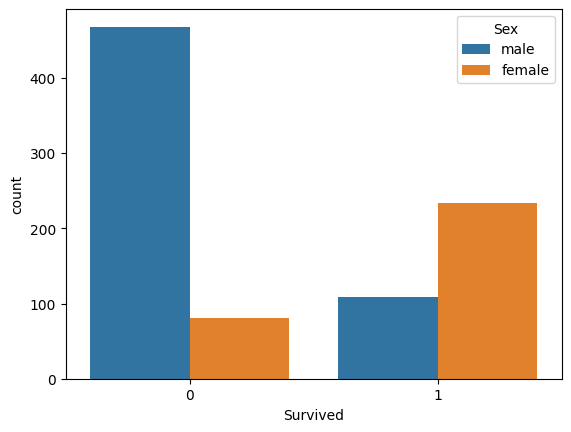

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [ ]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

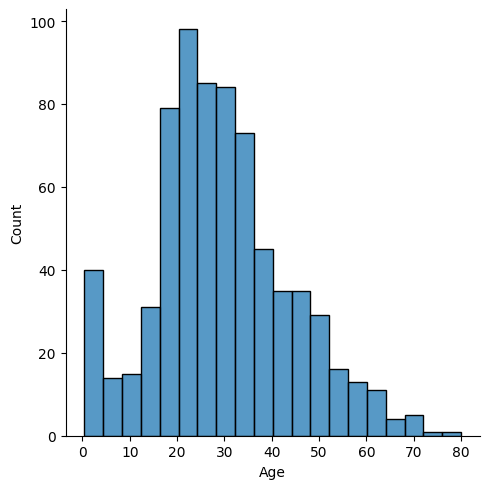

In [ ]:
sb.displot(x="Age", data=datos)

In [ ]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
datos["Age"].mean()

29.69911764705882

In [ ]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [ ]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
datos = datos.drop(["Cabin"], axis=1)

In [ ]:
datos["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
datos = datos.dropna()

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [ ]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [ ]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

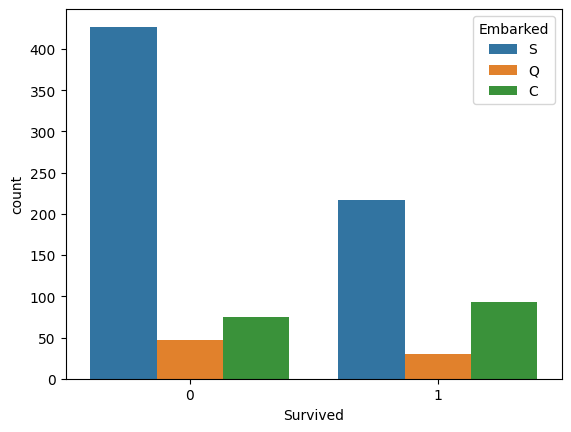

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [ ]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [ ]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

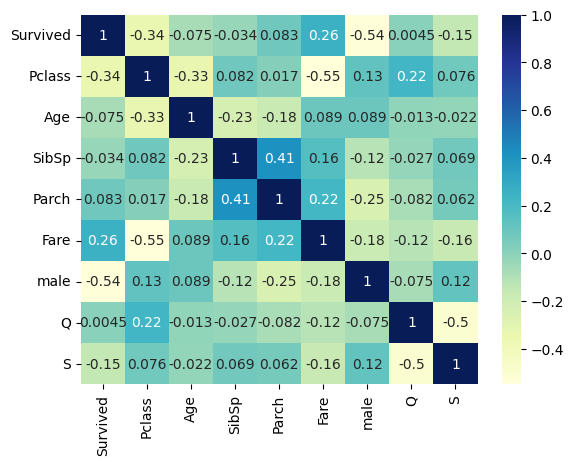

In [ ]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

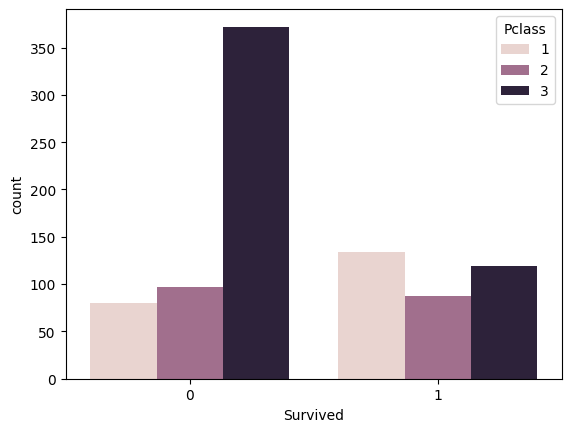

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [ ]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7640449438202247

In [ ]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
 modelo = DecisionTreeClassifier(max_depth=i)
 modelo.fit(X_ent, y_ent)
 predicciones = modelo.predict(X_pru)
 exactitud = accuracy_score(y_pru, predicciones)
 print(f"Resultado para {i}: {exactitud}")
 resultados.append(exactitud)

Resultado para 1: 0.7415730337078652
Resultado para 2: 0.7528089887640449
Resultado para 3: 0.797752808988764
Resultado para 4: 0.797752808988764
Resultado para 5: 0.7921348314606742
Resultado para 6: 0.797752808988764
Resultado para 7: 0.8033707865168539
Resultado para 8: 0.7921348314606742
Resultado para 9: 0.7921348314606742
Resultado para 10: 0.7696629213483146
Resultado para 11: 0.7640449438202247
Resultado para 12: 0.7528089887640449
Resultado para 13: 0.7359550561797753
Resultado para 14: 0.7640449438202247


<Axes: >

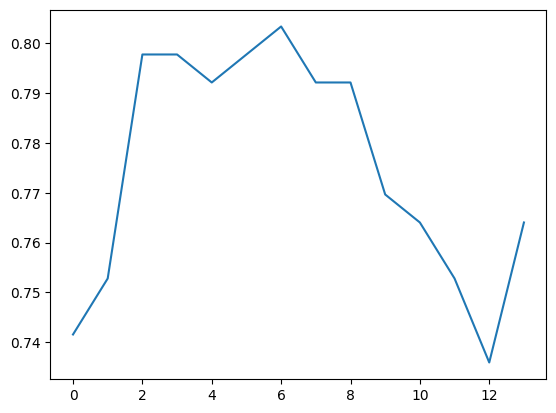

In [ ]:
sb.lineplot(data=resultados)

In [ ]:
modelo = DecisionTreeClassifier(max_depth=7)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       106
           1       0.79      0.69      0.74        72

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,93,13
Real: Si,22,50


[Text(0.5375, 0.9375, 'male <= 0.5\n0.47\n711\n[443, 268]\nMurió'),
 Text(0.30227272727272725, 0.8125, 'Pclass <= 2.5\n0.373\n246\n[61, 185]\nVivió'),
 Text(0.1, 0.6875, 'Age <= 2.5\n0.098\n135\n[7, 128]\nVivió'),
 Text(0.03636363636363636, 0.5625, 'Fare <= 88.775\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.01818181818181818, 0.4375, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.05454545454545454, 0.4375, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.16363636363636364, 0.5625, 'Fare <= 13.25\n0.086\n133\n[6, 127]\nVivió'),
 Text(0.09090909090909091, 0.4375, 'Age <= 53.5\n0.236\n22\n[3, 19]\nVivió'),
 Text(0.07272727272727272, 0.3125, 'Age <= 25.5\n0.172\n21\n[2, 19]\nVivió'),
 Text(0.03636363636363636, 0.1875, 'Age <= 22.5\n0.375\n4\n[1, 3]\nVivió'),
 Text(0.01818181818181818, 0.0625, '0.0\n2\n[0, 2]\nVivió'),
 Text(0.05454545454545454, 0.0625, '0.5\n2\n[1, 1]\nMurió'),
 Text(0.10909090909090909, 0.1875, 'Age <= 37.0\n0.111\n17\n[1, 16]\nVivió'),
 Text(0.09090909090909091, 0.0625, '0.0\n13\n[0, 13]\nVivió'),
 Text(0.12

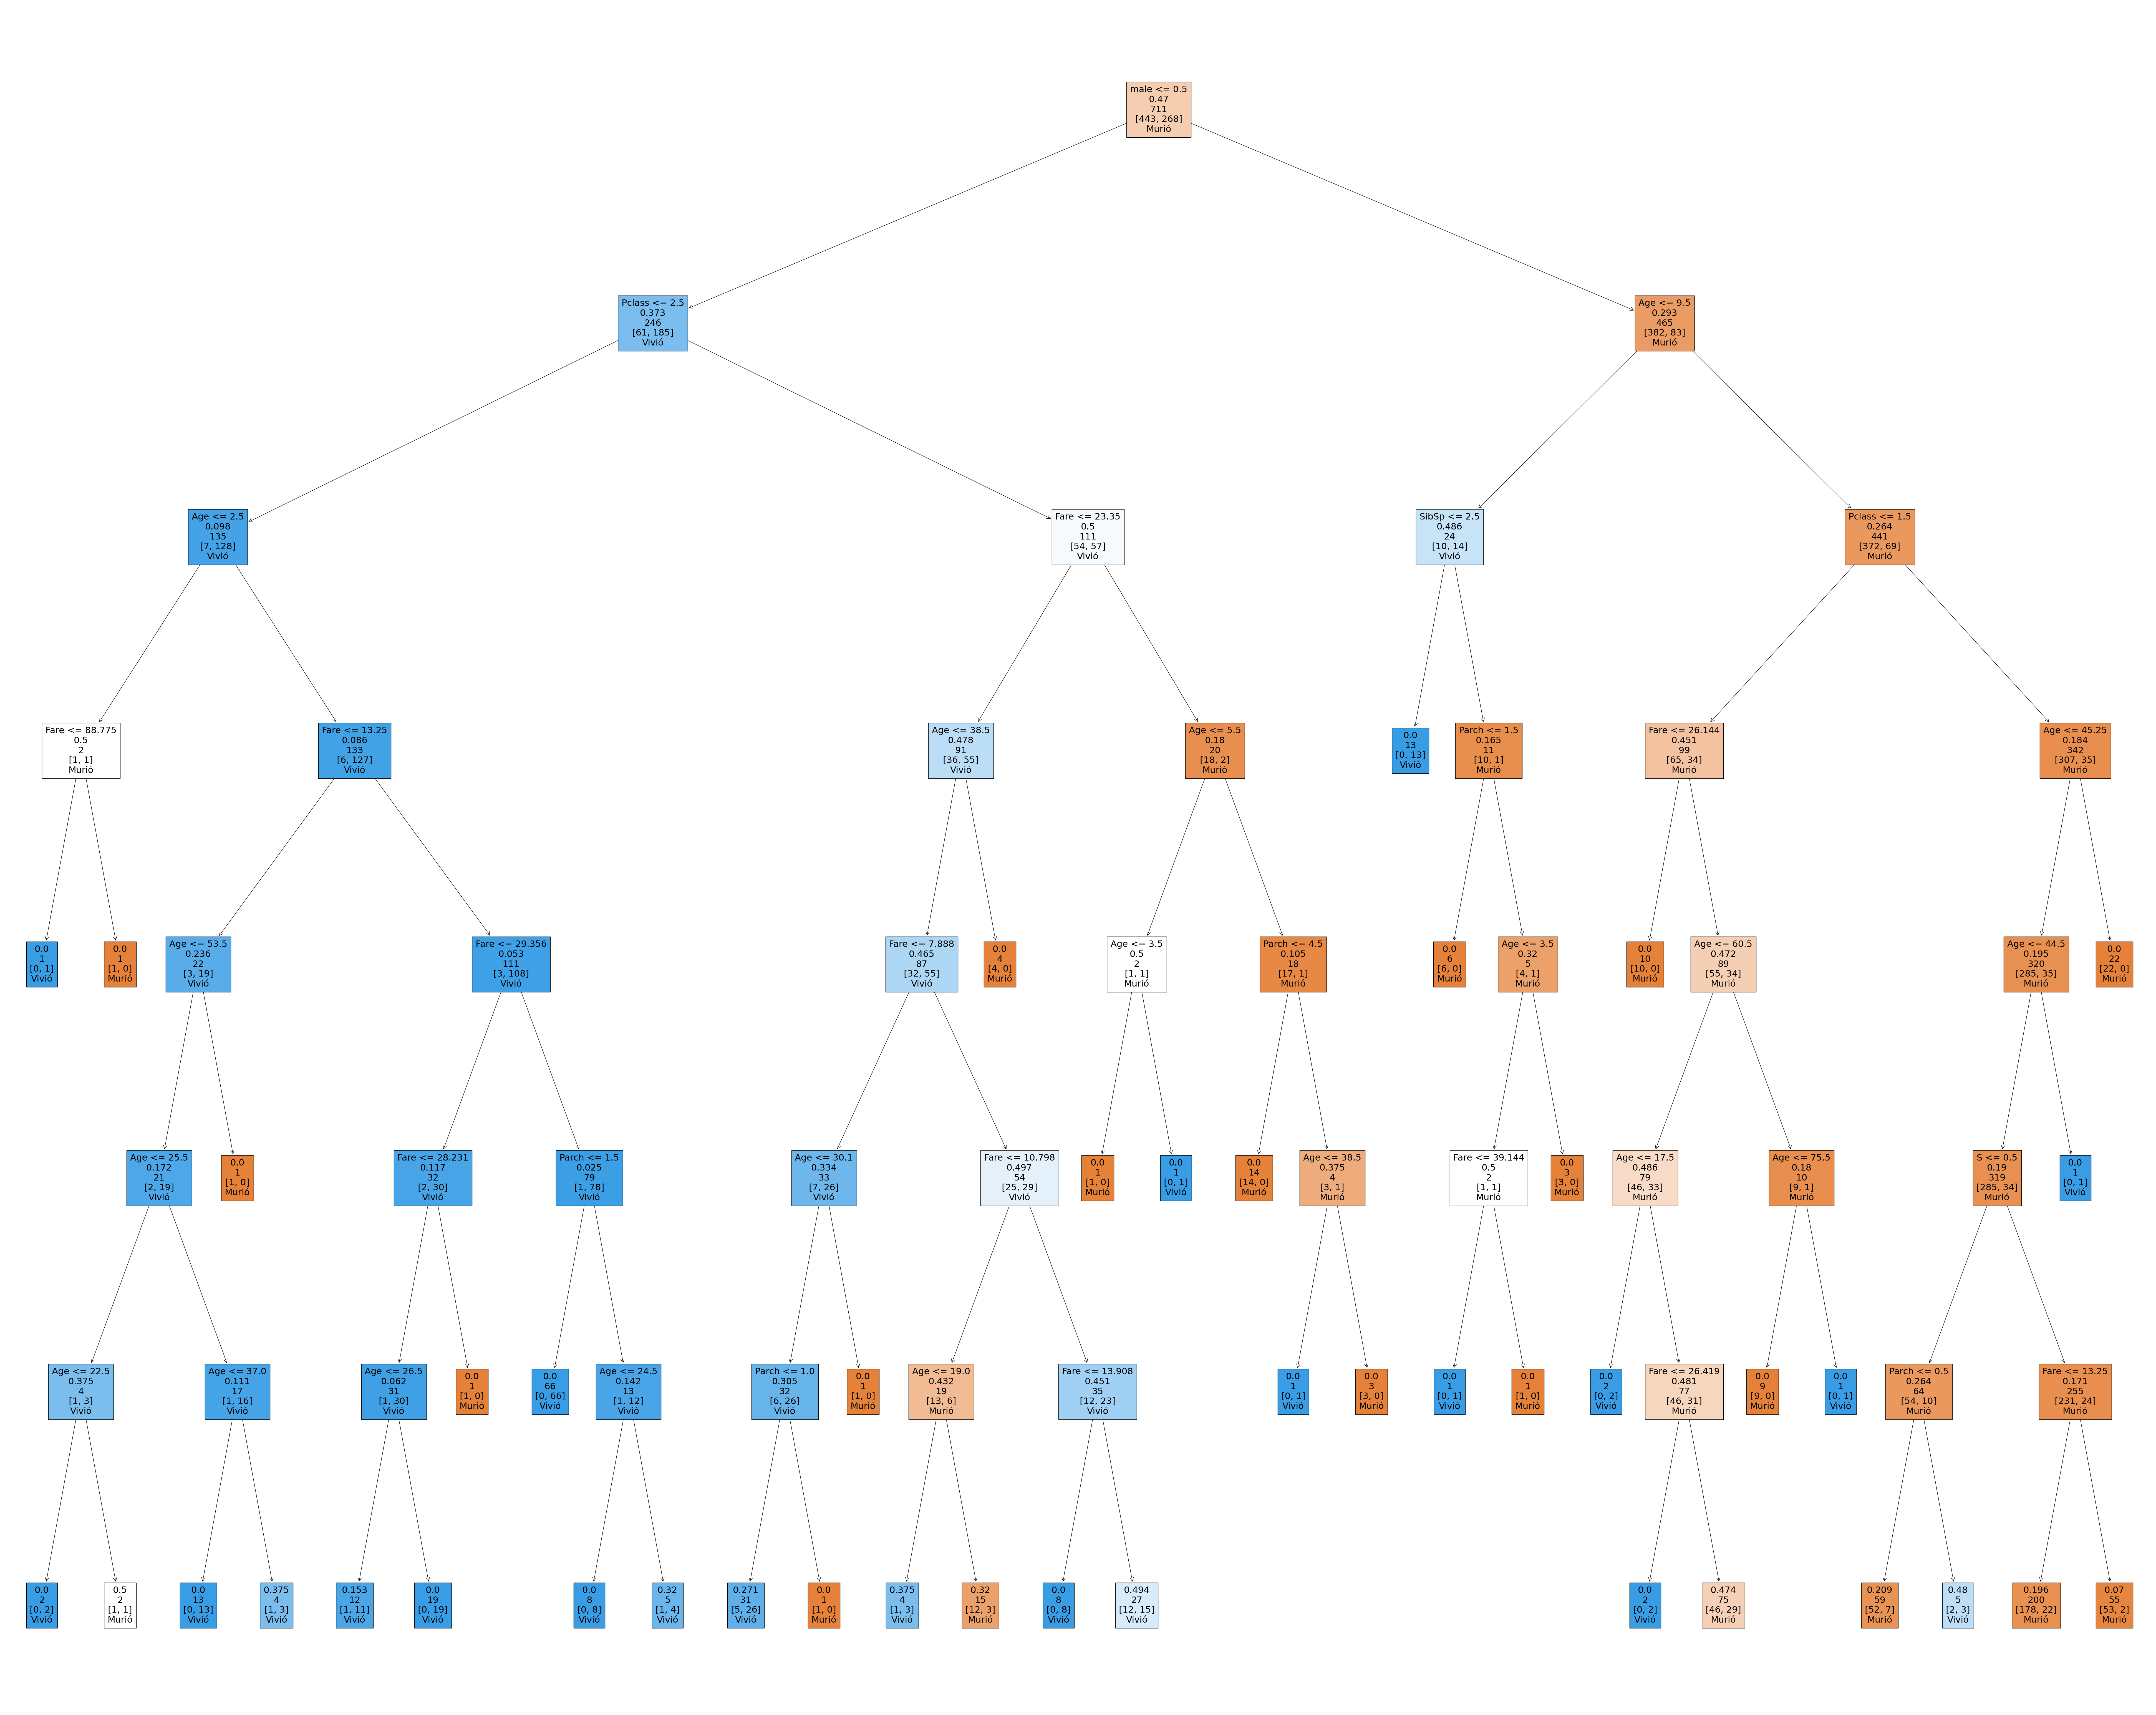

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=['Murió', 'Vivió'],
    filled=True, label='none'
)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.797752808988764

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       115
           1       0.71      0.71      0.71        63

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[97, 18],
       [18, 45]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,97,18
Real: Si,18,45


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

Sobreviviste


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
